In [820]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Important functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [821]:
df=pd.read_csv("fiveyearsweatherdata.csv")

In [822]:
df

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,"Kolkata,West Bengal,India",01/01/2017,14.0,25.3,19.9,16.5,82.47,NaN,5.8,NaN,...,1.2,4.9,1015.9,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
1,"Kolkata,West Bengal,India",01/02/2017,16.0,26.0,20.6,16.0,76.76,NaN,8.1,NaN,...,1.4,0.3,1015.6,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
2,"Kolkata,West Bengal,India",01/03/2017,16.0,27.0,21.1,15.6,73.12,27.3,9.2,NaN,...,1.6,10.7,1014.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
3,"Kolkata,West Bengal,India",01/04/2017,16.0,25.0,19.9,14.5,72.57,NaN,8.1,NaN,...,1.8,2.3,1014.6,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
4,"Kolkata,West Bengal,India",01/05/2017,15.0,25.6,19.6,13.7,71.88,NaN,8.1,NaN,...,1.9,0.0,1013.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,"Kolkata,West Bengal,India",12/27/2021,16.0,26.0,21.3,18.2,83.47,NaN,3.4,NaN,...,1.2,27.5,1017.0,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Partially cloudy
1822,"Kolkata,West Bengal,India",12/28/2021,17.8,26.0,21.1,17.3,79.94,NaN,6.9,NaN,...,1.3,33.1,1016.4,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Partially cloudy
1823,"Kolkata,West Bengal,India",12/29/2021,18.0,25.0,20.7,17.2,81.38,NaN,6.9,NaN,...,1.5,63.5,1016.5,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Partially cloudy
1824,"Kolkata,West Bengal,India",12/30/2021,17.0,23.0,19.4,17.4,88.30,NaN,9.2,NaN,...,1.4,42.4,1018.9,"Mist, Light Drizzle, Thunderstorm, Light Rain,...",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,"Rain, Partially cloudy"


# Removing or filling the empty values according to need

In [823]:
df.isnull().sum()

Address                   0
Date time                 0
Minimum Temperature       0
Maximum Temperature       0
Temperature               0
Dew Point                 0
Relative Humidity         0
Heat Index              288
Wind Speed                0
Wind Gust              1772
Wind Direction            0
Wind Chill             1813
Precipitation             0
Precipitation Cover       0
Snow Depth                0
Visibility                0
Cloud Cover               0
Sea Level Pressure        1
Weather Type              1
Latitude                  0
Longitude                 0
Resolved Address          0
Name                      0
Info                   1826
Conditions                0
dtype: int64

In [824]:
# As info column is having no data in it at all so we will drop that column
df=df.drop('Info',1)
df

/tmp/ipykernel_7327/2389789617.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('Info',1)


,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Conditions
0,"Kolkata,West Bengal,India",01/01/2017,14.0,25.3,19.9,16.5,82.47,NaN,5.8,NaN,...,0.0,1.2,4.9,1015.9,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
1,"Kolkata,West Bengal,India",01/02/2017,16.0,26.0,20.6,16.0,76.76,NaN,8.1,NaN,...,0.0,1.4,0.3,1015.6,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
2,"Kolkata,West Bengal,India",01/03/2017,16.0,27.0,21.1,15.6,73.12,27.3,9.2,NaN,...,0.0,1.6,10.7,1014.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
3,"Kolkata,West Bengal,India",01/04/2017,16.0,25.0,19.9,14.5,72.57,NaN,8.1,NaN,...,0.0,1.8,2.3,1014.6,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
4,"Kolkata,West Bengal,India",01/05/2017,15.0,25.6,19.6,13.7,71.88,NaN,8.1,NaN,...,0.0,1.9,0.0,1013.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,"Kolkata,West Bengal,India",12/27/2021,16.0,26.0,21.3,18.2,83.47,NaN,3.4,NaN,...,0.0,1.2,27.5,1017.0,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Partially cloudy
1822,"Kolkata,West Bengal,India",12/28/2021,17.8,26.0,21.1,17.3,79.94,NaN,6.9,NaN,...,0.0,1.3,33.1,1016.4,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Partially cloudy
1823,"Kolkata,West Bengal,India",12/29/2021,18.0,25.0,20.7,17.2,81.38,NaN,6.9,NaN,...,0.0,1.5,63.5,1016.5,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Partially cloudy
1824,"Kolkata,West Bengal,India",12/30/2021,17.0,23.0,19.4,17.4,88.30,NaN,9.2,NaN,...,0.0,1.4,42.4,1018.9,"Mist, Light Drizzle, Thunderstorm, Light Rain,...",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India","Rain, Partially cloudy"


In [825]:
df.corr()

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Latitude,Longitude
Minimum Temperature,1.000000,0.824224,0.958463,0.940316,0.443055,0.838437,0.269742,-0.244660,0.160842,0.890450,0.151248,0.343723,NaN,0.644350,0.680372,-0.810808,NaN,NaN
Maximum Temperature,0.824224,1.000000,0.940029,0.732679,0.025674,0.759684,0.245371,0.159314,0.229337,0.171784,-0.043728,0.001844,NaN,0.692256,0.316361,-0.612912,NaN,NaN
Temperature,0.958463,0.940029,1.000000,0.890834,0.266968,0.877149,0.276216,-0.003066,0.197111,0.280262,0.069651,0.203178,NaN,0.708290,0.547889,-0.758368,NaN,NaN
Dew Point,0.940316,0.732679,0.890834,1.000000,0.672255,0.879954,0.252378,-0.169018,0.088785,0.255348,0.222860,0.445784,NaN,0.562948,0.769375,-0.835369,NaN,NaN
Relative Humidity,0.443055,0.025674,0.266968,0.672255,1.000000,0.503229,0.078292,-0.171086,-0.143898,0.060299,0.392714,0.655816,NaN,0.030312,0.755935,-0.553765,NaN,NaN
Heat Index,0.838437,0.759684,0.877149,0.879954,0.503229,1.000000,0.214240,0.117294,0.184540,NaN,0.081908,0.230354,NaN,0.556478,0.555531,-0.714709,NaN,NaN
Wind Speed,0.269742,0.245371,0.276216,0.252378,0.078292,0.214240,1.000000,0.785419,0.234277,-0.175172,0.133708,0.127770,NaN,0.261554,0.227558,-0.265924,NaN,NaN
Wind Gust,-0.244660,0.159314,-0.003066,-0.169018,-0.171086,0.117294,0.785419,1.000000,0.140685,NaN,0.269588,-0.009041,NaN,-0.132091,-0.177788,-0.207798,NaN,NaN
Wind Direction,0.160842,0.229337,0.197111,0.088785,-0.143898,0.184540,0.234277,0.140685,1.000000,0.141528,-0.037384,-0.130835,NaN,0.234532,0.012501,-0.092170,NaN,NaN
Wind Chill,0.890450,0.171784,0.280262,0.255348,0.060299,NaN,-0.175172,NaN,0.141528,1.000000,NaN,NaN,NaN,-0.033242,0.063887,-0.014016,NaN,NaN


In [826]:
# a=pd.dataFrame(df)
df['Wind Chill'].unique()

array([nan, 9.1, 7.6, 7.9, 9.6, 8.8, 8.5])

In [827]:
df

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Conditions
0,"Kolkata,West Bengal,India",01/01/2017,14.0,25.3,19.9,16.5,82.47,NaN,5.8,NaN,...,0.0,1.2,4.9,1015.9,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
1,"Kolkata,West Bengal,India",01/02/2017,16.0,26.0,20.6,16.0,76.76,NaN,8.1,NaN,...,0.0,1.4,0.3,1015.6,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
2,"Kolkata,West Bengal,India",01/03/2017,16.0,27.0,21.1,15.6,73.12,27.3,9.2,NaN,...,0.0,1.6,10.7,1014.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
3,"Kolkata,West Bengal,India",01/04/2017,16.0,25.0,19.9,14.5,72.57,NaN,8.1,NaN,...,0.0,1.8,2.3,1014.6,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
4,"Kolkata,West Bengal,India",01/05/2017,15.0,25.6,19.6,13.7,71.88,NaN,8.1,NaN,...,0.0,1.9,0.0,1013.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,"Kolkata,West Bengal,India",12/27/2021,16.0,26.0,21.3,18.2,83.47,NaN,3.4,NaN,...,0.0,1.2,27.5,1017.0,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Partially cloudy
1822,"Kolkata,West Bengal,India",12/28/2021,17.8,26.0,21.1,17.3,79.94,NaN,6.9,NaN,...,0.0,1.3,33.1,1016.4,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Partially cloudy
1823,"Kolkata,West Bengal,India",12/29/2021,18.0,25.0,20.7,17.2,81.38,NaN,6.9,NaN,...,0.0,1.5,63.5,1016.5,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Partially cloudy
1824,"Kolkata,West Bengal,India",12/30/2021,17.0,23.0,19.4,17.4,88.30,NaN,9.2,NaN,...,0.0,1.4,42.4,1018.9,"Mist, Light Drizzle, Thunderstorm, Light Rain,...",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India","Rain, Partially cloudy"


/usr/lib/python3/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Heat Index'>

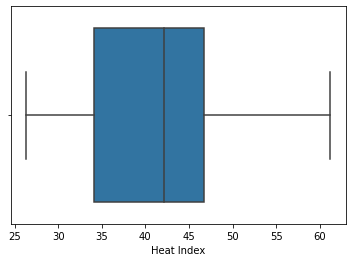

In [828]:
sns.boxplot(df["Heat Index"])

In [829]:
df['Heat Index'].unique()

array([ nan, 27.3, 26.8, 26.5, 26.7, 26.3, 27.6, 29.2, 28.3, 27.5, 27.1,
       28.4, 29. , 28.8, 27.2, 28.1, 28.7, 29.5, 30. , 30.9, 31.9, 34.6,
       35.7, 35. , 29.3, 30.4, 30.1, 30.5, 34.1, 34. , 32.3, 32. , 36.5,
       33.7, 29.1, 31.5, 29.7, 32.4, 36.8, 30.6, 34.3, 35.1, 39. , 40.4,
       38.4, 40.6, 39.3, 39.8, 43.5, 42. , 40.9, 43.3, 39.1, 41.1, 36.9,
       38.9, 39.5, 43.2, 41.9, 41.4, 45.4, 44.8, 46.1, 44. , 45.1, 46.3,
       44.7, 39.7, 43.8, 46. , 44.9, 42.8, 42.7, 48. , 48.3, 41.6, 50.1,
       46.7, 44.4, 49. , 48.6, 50.9, 45. , 43.6, 41.5, 49.5, 50.2, 47.2,
       49.9, 52.5, 51. , 43.9, 42.4, 45.3, 42.3, 42.9, 47. , 48.1, 48.5,
       49.7, 34.5, 45.8, 42.1, 44.1, 47.3, 44.6, 41.7, 38.8, 37.1, 32.7,
       48.7, 40.7, 39.2, 42.2, 41.3, 40.2, 37.4, 43. , 44.3, 35.6, 40.3,
       37.3, 37.7, 33. , 32.5, 33.4, 30.8, 31.4, 32.9, 35.4, 31. , 29.9,
       33.6, 35.5, 27.9, 27. , 26.9, 28.2, 29.8, 26.4, 28.6, 30.3, 29.6,
       27.8, 27.4, 28. , 31.3, 35.2, 36.3, 34.2, 34

In [830]:
#FILLING NAN VALUE IN HEAT INDEX AND SEA LEVEL PRESSURE COLUMN WITH MEAN VALUE
mean_value=df["Heat Index"].mean()
df["Heat Index"].fillna(value=mean_value, inplace=True)
mean_value=df["Sea Level Pressure"].mean()
df["Sea Level Pressure"].fillna(value=mean_value, inplace=True)
mean_value=df["Wind Chill"].mean()
df["Wind Chill"].fillna(value=mean_value, inplace=True)
mean_value=df["Wind Gust"].mean()
df["Wind Gust"].fillna(value=mean_value, inplace=True)

In [831]:
df.isnull().sum()

Address                0
Date time              0
Minimum Temperature    0
Maximum Temperature    0
Temperature            0
Dew Point              0
Relative Humidity      0
Heat Index             0
Wind Speed             0
Wind Gust              0
Wind Direction         0
Wind Chill             0
Precipitation          0
Precipitation Cover    0
Snow Depth             0
Visibility             0
Cloud Cover            0
Sea Level Pressure     0
Weather Type           1
Latitude               0
Longitude              0
Resolved Address       0
Name                   0
Conditions             0
dtype: int64

In [832]:
df

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Conditions
0,"Kolkata,West Bengal,India",01/01/2017,14.0,25.3,19.9,16.5,82.47,40.740182,5.8,30.938889,...,0.0,1.2,4.9,1015.9,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
1,"Kolkata,West Bengal,India",01/02/2017,16.0,26.0,20.6,16.0,76.76,40.740182,8.1,30.938889,...,0.0,1.4,0.3,1015.6,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
2,"Kolkata,West Bengal,India",01/03/2017,16.0,27.0,21.1,15.6,73.12,27.300000,9.2,30.938889,...,0.0,1.6,10.7,1014.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
3,"Kolkata,West Bengal,India",01/04/2017,16.0,25.0,19.9,14.5,72.57,40.740182,8.1,30.938889,...,0.0,1.8,2.3,1014.6,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
4,"Kolkata,West Bengal,India",01/05/2017,15.0,25.6,19.6,13.7,71.88,40.740182,8.1,30.938889,...,0.0,1.9,0.0,1013.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,"Kolkata,West Bengal,India",12/27/2021,16.0,26.0,21.3,18.2,83.47,40.740182,3.4,30.938889,...,0.0,1.2,27.5,1017.0,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Partially cloudy
1822,"Kolkata,West Bengal,India",12/28/2021,17.8,26.0,21.1,17.3,79.94,40.740182,6.9,30.938889,...,0.0,1.3,33.1,1016.4,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Partially cloudy
1823,"Kolkata,West Bengal,India",12/29/2021,18.0,25.0,20.7,17.2,81.38,40.740182,6.9,30.938889,...,0.0,1.5,63.5,1016.5,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Partially cloudy
1824,"Kolkata,West Bengal,India",12/30/2021,17.0,23.0,19.4,17.4,88.30,40.740182,9.2,30.938889,...,0.0,1.4,42.4,1018.9,"Mist, Light Drizzle, Thunderstorm, Light Rain,...",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India","Rain, Partially cloudy"


In [833]:
df["Weather Type"].unique()

array(['Mist, Fog, Smoke Or Haze', 'Mist, Smoke Or Haze',
       'Mist, Rain, Sky Coverage Increasing, Smoke Or Haze',
       'Mist, Fog, Sky Coverage Decreasing, Smoke Or Haze',
       'Mist, Sky Coverage Increasing, Sky Unchanged, Smoke Or Haze',
       'Light Drizzle, Sky Coverage Increasing, Smoke Or Haze',
       'Smoke Or Haze', 'Mist, Light Rain, Smoke Or Haze',
       'Mist, Light Drizzle, Thunderstorm, Rain, Light Rain, Smoke Or Haze',
       'Mist, Rain, Thunderstorm, Thunderstorm Without Precipitation, Fog, Heavy Rain, Light Rain, Sky Coverage Decreasing, Sky Coverage Increasing, Sky Unchanged, Smoke Or Haze',
       'Mist, Thunderstorm, Fog, Light Rain, Sky Coverage Increasing, Smoke Or Haze',
       'Mist, Thunderstorm, Light Rain, Sky Coverage Decreasing, Sky Coverage Increasing, Smoke Or Haze',
       'Mist, Rain, Light Rain, Smoke Or Haze',
       'Mist, Sky Coverage Increasing, Smoke Or Haze',
       'Lightning Without Thunder, Mist, Thunderstorm, Fog, Light Rain, Sky 

In [834]:
df=df.dropna(0)             #Removed one row in which Weather type was not mentioned

/tmp/ipykernel_7327/4031206605.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df=df.dropna(0)             #Removed one row in which Weather type was not mentioned


In [835]:
df

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Conditions
0,"Kolkata,West Bengal,India",01/01/2017,14.0,25.3,19.9,16.5,82.47,40.740182,5.8,30.938889,...,0.0,1.2,4.9,1015.9,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
1,"Kolkata,West Bengal,India",01/02/2017,16.0,26.0,20.6,16.0,76.76,40.740182,8.1,30.938889,...,0.0,1.4,0.3,1015.6,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
2,"Kolkata,West Bengal,India",01/03/2017,16.0,27.0,21.1,15.6,73.12,27.300000,9.2,30.938889,...,0.0,1.6,10.7,1014.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
3,"Kolkata,West Bengal,India",01/04/2017,16.0,25.0,19.9,14.5,72.57,40.740182,8.1,30.938889,...,0.0,1.8,2.3,1014.6,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
4,"Kolkata,West Bengal,India",01/05/2017,15.0,25.6,19.6,13.7,71.88,40.740182,8.1,30.938889,...,0.0,1.9,0.0,1013.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,"Kolkata,West Bengal,India",12/27/2021,16.0,26.0,21.3,18.2,83.47,40.740182,3.4,30.938889,...,0.0,1.2,27.5,1017.0,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Partially cloudy
1822,"Kolkata,West Bengal,India",12/28/2021,17.8,26.0,21.1,17.3,79.94,40.740182,6.9,30.938889,...,0.0,1.3,33.1,1016.4,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Partially cloudy
1823,"Kolkata,West Bengal,India",12/29/2021,18.0,25.0,20.7,17.2,81.38,40.740182,6.9,30.938889,...,0.0,1.5,63.5,1016.5,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",Partially cloudy
1824,"Kolkata,West Bengal,India",12/30/2021,17.0,23.0,19.4,17.4,88.30,40.740182,9.2,30.938889,...,0.0,1.4,42.4,1018.9,"Mist, Light Drizzle, Thunderstorm, Light Rain,...",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India","Rain, Partially cloudy"


In [836]:
df.isnull().sum()

Address                0
Date time              0
Minimum Temperature    0
Maximum Temperature    0
Temperature            0
Dew Point              0
Relative Humidity      0
Heat Index             0
Wind Speed             0
Wind Gust              0
Wind Direction         0
Wind Chill             0
Precipitation          0
Precipitation Cover    0
Snow Depth             0
Visibility             0
Cloud Cover            0
Sea Level Pressure     0
Weather Type           0
Latitude               0
Longitude              0
Resolved Address       0
Name                   0
Conditions             0
dtype: int64

In [837]:
df["Address"].unique()

array(['Kolkata,West Bengal,India'], dtype=object)

In [838]:
df["Longitude"].unique()

array([88.3713])

In [839]:
df["Latitude"].unique()

array([22.5705])

In [840]:
#As all the data in Address is Kolkata,West Bengal,India , Latitude and Longitude are also same so we can drop them too
df=df.drop(columns=["Address","Resolved Address","Name","Latitude","Longitude"])
df

,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Conditions
0,01/01/2017,14.0,25.3,19.9,16.5,82.47,40.740182,5.8,30.938889,78.33,8.730769,0.00,0.00,0.0,1.2,4.9,1015.9,"Mist, Fog, Smoke Or Haze",Clear
1,01/02/2017,16.0,26.0,20.6,16.0,76.76,40.740182,8.1,30.938889,148.54,8.730769,0.00,0.00,0.0,1.4,0.3,1015.6,"Mist, Fog, Smoke Or Haze",Clear
2,01/03/2017,16.0,27.0,21.1,15.6,73.12,27.300000,9.2,30.938889,244.92,8.730769,0.00,0.00,0.0,1.6,10.7,1014.7,"Mist, Smoke Or Haze",Clear
3,01/04/2017,16.0,25.0,19.9,14.5,72.57,40.740182,8.1,30.938889,244.38,8.730769,0.00,0.00,0.0,1.8,2.3,1014.6,"Mist, Smoke Or Haze",Clear
4,01/05/2017,15.0,25.6,19.6,13.7,71.88,40.740182,8.1,30.938889,231.58,8.730769,0.00,0.00,0.0,1.9,0.0,1013.7,"Mist, Smoke Or Haze",Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,12/27/2021,16.0,26.0,21.3,18.2,83.47,40.740182,3.4,30.938889,20.95,8.730769,0.00,0.00,0.0,1.2,27.5,1017.0,"Mist, Fog, Smoke Or Haze",Partially cloudy
1822,12/28/2021,17.8,26.0,21.1,17.3,79.94,40.740182,6.9,30.938889,28.18,8.730769,0.00,0.00,0.0,1.3,33.1,1016.4,"Mist, Fog, Smoke Or Haze",Partially cloudy
1823,12/29/2021,18.0,25.0,20.7,17.2,81.38,40.740182,6.9,30.938889,110.29,8.730769,0.00,0.00,0.0,1.5,63.5,1016.5,"Mist, Smoke Or Haze",Partially cloudy
1824,12/30/2021,17.0,23.0,19.4,17.4,88.30,40.740182,9.2,30.938889,213.63,8.730769,0.99,4.17,0.0,1.4,42.4,1018.9,"Mist, Light Drizzle, Thunderstorm, Light Rain,...","Rain, Partially cloudy"


In [841]:
df["Snow Depth"].unique()

array([0.])

In [842]:
#As all the data in Snow Depth is 0 so we can drop it too
df=df.drop("Snow Depth",1)
df

/tmp/ipykernel_7327/3162265969.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop("Snow Depth",1)


,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Conditions
0,01/01/2017,14.0,25.3,19.9,16.5,82.47,40.740182,5.8,30.938889,78.33,8.730769,0.00,0.00,1.2,4.9,1015.9,"Mist, Fog, Smoke Or Haze",Clear
1,01/02/2017,16.0,26.0,20.6,16.0,76.76,40.740182,8.1,30.938889,148.54,8.730769,0.00,0.00,1.4,0.3,1015.6,"Mist, Fog, Smoke Or Haze",Clear
2,01/03/2017,16.0,27.0,21.1,15.6,73.12,27.300000,9.2,30.938889,244.92,8.730769,0.00,0.00,1.6,10.7,1014.7,"Mist, Smoke Or Haze",Clear
3,01/04/2017,16.0,25.0,19.9,14.5,72.57,40.740182,8.1,30.938889,244.38,8.730769,0.00,0.00,1.8,2.3,1014.6,"Mist, Smoke Or Haze",Clear
4,01/05/2017,15.0,25.6,19.6,13.7,71.88,40.740182,8.1,30.938889,231.58,8.730769,0.00,0.00,1.9,0.0,1013.7,"Mist, Smoke Or Haze",Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,12/27/2021,16.0,26.0,21.3,18.2,83.47,40.740182,3.4,30.938889,20.95,8.730769,0.00,0.00,1.2,27.5,1017.0,"Mist, Fog, Smoke Or Haze",Partially cloudy
1822,12/28/2021,17.8,26.0,21.1,17.3,79.94,40.740182,6.9,30.938889,28.18,8.730769,0.00,0.00,1.3,33.1,1016.4,"Mist, Fog, Smoke Or Haze",Partially cloudy
1823,12/29/2021,18.0,25.0,20.7,17.2,81.38,40.740182,6.9,30.938889,110.29,8.730769,0.00,0.00,1.5,63.5,1016.5,"Mist, Smoke Or Haze",Partially cloudy
1824,12/30/2021,17.0,23.0,19.4,17.4,88.30,40.740182,9.2,30.938889,213.63,8.730769,0.99,4.17,1.4,42.4,1018.9,"Mist, Light Drizzle, Thunderstorm, Light Rain,...","Rain, Partially cloudy"


# Analysing the data and removing skewness if any

In [843]:
for i  in df:
    print((i))

Date time
Minimum Temperature
Maximum Temperature
Temperature
Dew Point
Relative Humidity
Heat Index
Wind Speed
Wind Gust
Wind Direction
Wind Chill
Precipitation
Precipitation Cover
Visibility
Cloud Cover
Sea Level Pressure
Weather Type
Conditions


/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Minimum Temperature', ylabel='Density'>

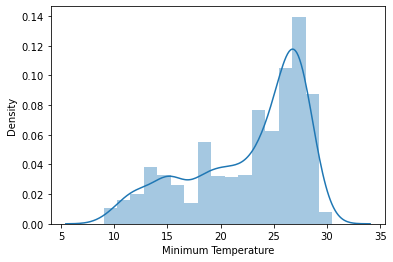

In [844]:
sns.distplot(df['Minimum Temperature'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Maximum Temperature', ylabel='Density'>

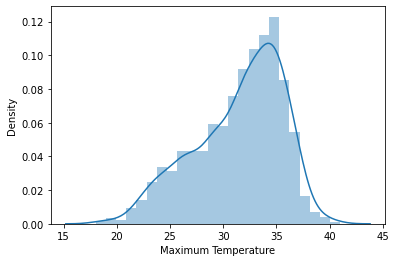

In [845]:
sns.distplot(df['Maximum Temperature'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

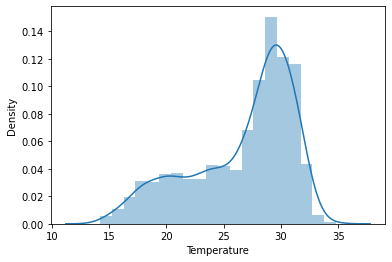

In [846]:
sns.distplot(df['Temperature'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dew Point', ylabel='Density'>

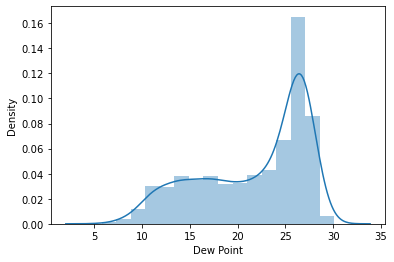

In [847]:
sns.distplot(df['Dew Point'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Relative Humidity', ylabel='Density'>

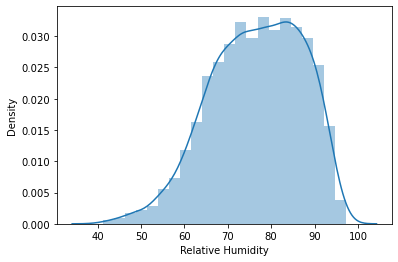

In [848]:
sns.distplot(df['Relative Humidity'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Heat Index', ylabel='Density'>

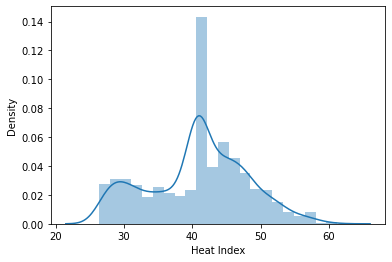

In [849]:
sns.distplot(df['Heat Index'])

In [850]:
#Trying to remove skewness from Dew Point, Temperature, Maximum Temperature and Minimum Temperature using Function Transformer

from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
df['Dew Point']=transformer.transform(df['Dew Point'])
df['Temperature']=transformer.transform(df["Temperature"])
df['Maximum Temperature']=transformer.transform(df["Maximum Temperature"])
df['Minimum Temperature']=transformer.transform(df["Minimum Temperature"])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Minimum Temperature', ylabel='Density'>

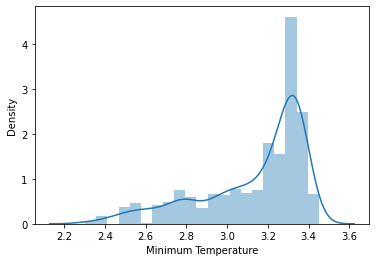

In [851]:
sns.distplot(df['Minimum Temperature'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Maximum Temperature', ylabel='Density'>

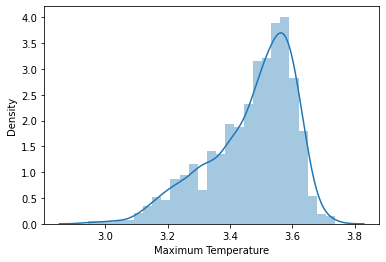

In [852]:
sns.distplot(df['Maximum Temperature'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

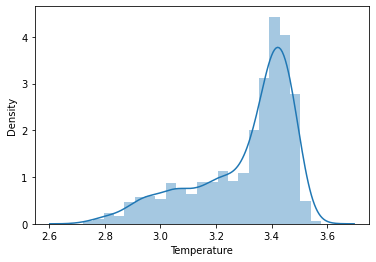

In [853]:
sns.distplot(df['Temperature'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dew Point', ylabel='Density'>

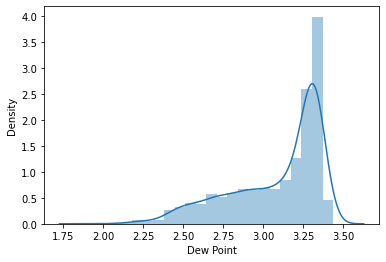

In [854]:
sns.distplot(df['Dew Point'])

#### Function Transformer with function np.log1p was of no use  as even after fucntion everything got scaled down and nothing in distplot changed.

In [855]:
df=df.drop("Weather Type",1)

/tmp/ipykernel_7327/1281453068.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop("Weather Type",1)


In [856]:
# Trying to remove skewness from Dew Point, Temperature, Maximum Temperature and Minimum Temperature using Function Transformer

# from sklearn.preprocessing import FunctionTransformer
# transformer = FunctionTransformer(np.log1p)
# df['Dew Point']=transformer.transform(df['Dew Point'])
# df['Temperature']=transformer.transform(df["Temperature"])
# df['Maximum Temperature']=transformer.transform(df["Maximum Temperature"])
# df['Minimum Temperature']=transformer.transform(df["Minimum Temperature"])

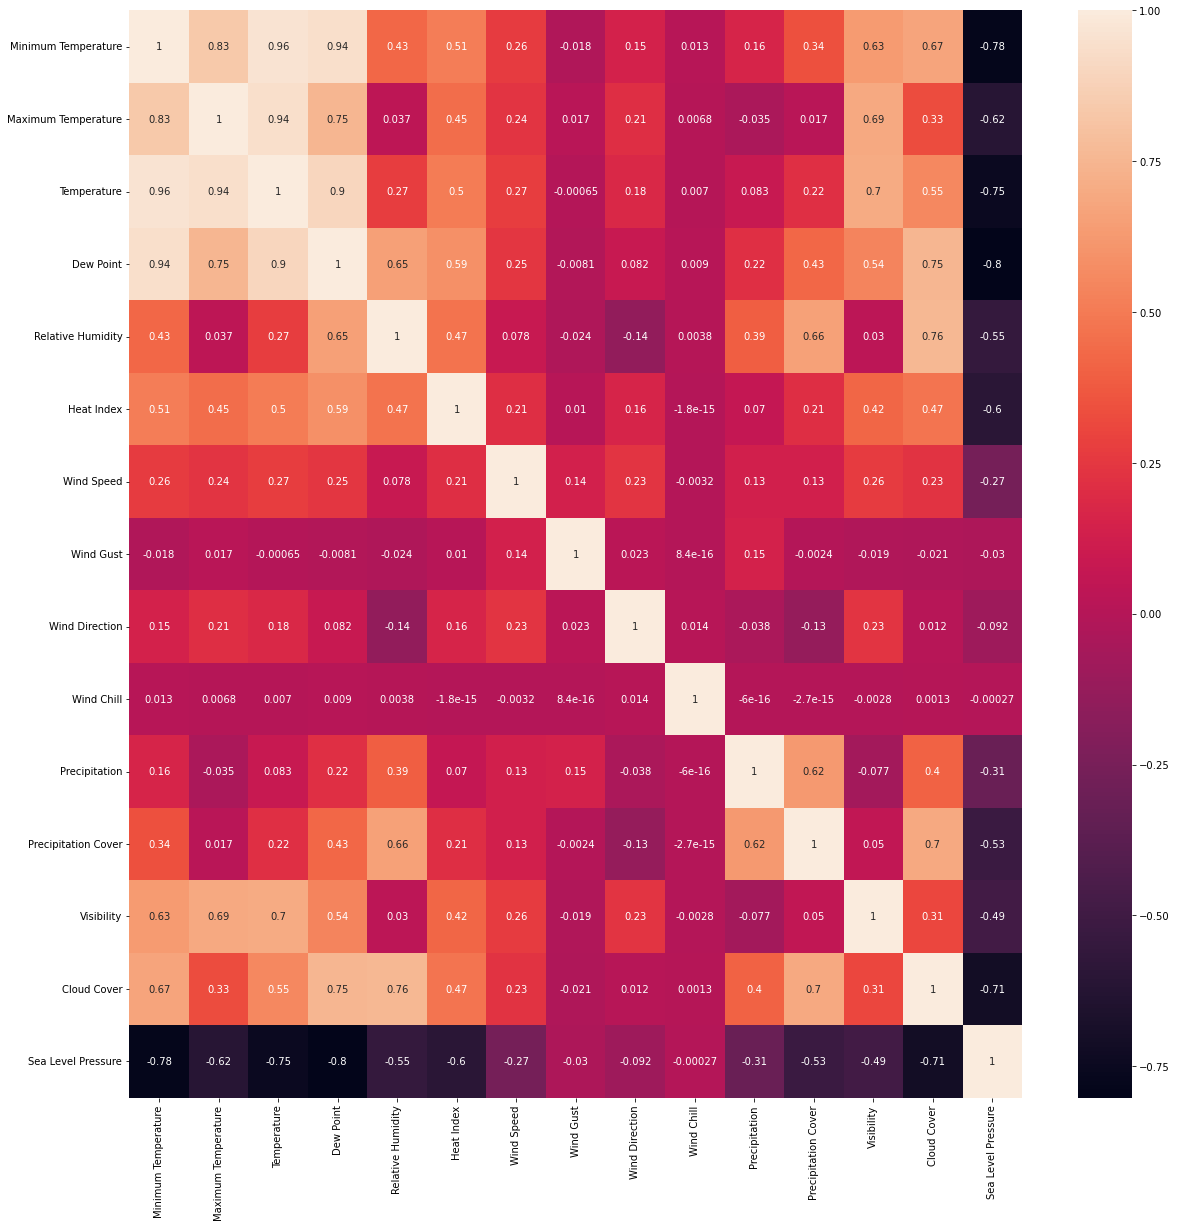

In [857]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True);

# Giving cleaned dataset to various models and checking their accuracy

In [858]:
#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [859]:
#Seperating Response Variable from the dataset
df=df.drop("Date time",1)
X=df.drop('Conditions',axis=1)
y=df['Conditions']

/tmp/ipykernel_7327/925876582.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop("Date time",1)


In [860]:
#train_test_split()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.35, random_state=2)

In [861]:
#Models
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('DT',DecisionTreeClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))

In [862]:
df

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Conditions
0,2.708050,3.269569,3.039749,2.862201,82.47,40.740182,5.8,30.938889,78.33,8.730769,0.00,0.00,1.2,4.9,1015.9,Clear
1,2.833213,3.295837,3.072693,2.833213,76.76,40.740182,8.1,30.938889,148.54,8.730769,0.00,0.00,1.4,0.3,1015.6,Clear
2,2.833213,3.332205,3.095578,2.809403,73.12,27.300000,9.2,30.938889,244.92,8.730769,0.00,0.00,1.6,10.7,1014.7,Clear
3,2.833213,3.258097,3.039749,2.740840,72.57,40.740182,8.1,30.938889,244.38,8.730769,0.00,0.00,1.8,2.3,1014.6,Clear
4,2.772589,3.280911,3.025291,2.687847,71.88,40.740182,8.1,30.938889,231.58,8.730769,0.00,0.00,1.9,0.0,1013.7,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2.833213,3.295837,3.104587,2.954910,83.47,40.740182,3.4,30.938889,20.95,8.730769,0.00,0.00,1.2,27.5,1017.0,Partially cloudy
1822,2.933857,3.295837,3.095578,2.906901,79.94,40.740182,6.9,30.938889,28.18,8.730769,0.00,0.00,1.3,33.1,1016.4,Partially cloudy
1823,2.944439,3.258097,3.077312,2.901422,81.38,40.740182,6.9,30.938889,110.29,8.730769,0.00,0.00,1.5,63.5,1016.5,Partially cloudy
1824,2.890372,3.178054,3.015535,2.912351,88.30,40.740182,9.2,30.938889,213.63,8.730769,0.99,4.17,1.4,42.4,1018.9,"Rain, Partially cloudy"


In [863]:
X_train

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure
313,3.091042,3.465736,3.265759,2.917771,65.26,31.400000,9.2,30.938889,84.46,8.730769,0.00,0.00,2.1,14.9,1011.7
960,3.295837,3.535145,3.414443,3.299534,83.24,44.300000,16.1,30.938889,170.92,8.730769,0.21,4.17,2.4,47.9,1004.8
985,3.332205,3.496508,3.384390,3.321432,90.05,44.100000,15.0,30.938889,181.46,8.730769,0.08,4.17,2.2,66.0,1006.5
1091,2.302585,3.025291,2.721295,2.517696,83.74,40.740182,9.2,30.938889,256.29,8.500000,0.00,0.00,1.3,2.5,1017.3
603,3.332205,3.496508,3.404525,3.325036,87.93,44.100000,13.9,30.938889,98.75,8.730769,2.49,12.50,2.1,69.6,998.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,3.321432,3.555348,3.433987,3.242592,73.86,42.000000,16.1,30.938889,182.71,8.730769,0.00,0.00,2.2,63.1,1008.1
1609,3.367296,3.555348,3.456317,3.332205,81.51,45.300000,12.8,30.938889,161.25,8.730769,0.00,0.00,2.3,45.2,1004.9
493,3.401197,3.663562,3.499533,3.325036,74.44,51.300000,17.2,30.938889,191.96,8.730769,0.00,0.00,2.2,55.3,1005.1
527,3.295837,3.610918,3.391147,3.284664,84.97,50.200000,8.1,30.938889,190.79,8.730769,20.13,12.50,1.9,82.3,993.4


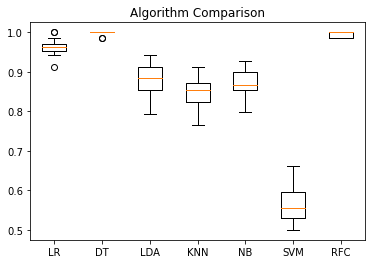

In [864]:
#Compare our models
plt.boxplot(results,labels=names)
plt.title("Algorithm Comparison")
plt.show()


In [865]:
#Logistic Regression Classifier
lrc = LogisticRegression(solver='liblinear',multi_class='ovr')
lrc.fit(X_train,y_train)
pred_y=lrc.predict(X_val)

#Accuracy
print('Accuracy of the LRC:',accuracy_score(y_val.values,pred_y)*100,"%")

Accuracy of the LRC: 96.08763693270735 %


In [866]:
#Random Forest Classifier 
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_y=rf.predict(X_val)

#Accuracy
print('Accuracy of the RFC:',accuracy_score(y_val.values,pred_y)*100,"%")

Accuracy of the RFC: 99.21752738654148 %


In [867]:
#KNeighbors Classifier
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
pred_y=knc.predict(X_val)

#Accuracy
print('Accuracy of the KNC:',accuracy_score(y_val.values,pred_y)*100,"%")

Accuracy of the KNC: 84.03755868544602 %


In [868]:
#Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
pred_y=lda.predict(X_val)

#Accuracy
print('Accuracy of the LDA:',accuracy_score(y_val.values,pred_y)*100,"%")

Accuracy of the LDA: 87.63693270735524 %


In [869]:
#GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
pred_y=nb.predict(X_val)

#Accuracy
print('Accuracy of the NB:',accuracy_score(y_val.values,pred_y)*100,"%")

Accuracy of the NB: 85.13302034428794 %
